In [1]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando o algoritmo K-Means:
from sklearn.cluster import KMeans

# Métrica de avaliação para modelos de clustering:
from sklearn.metrics import silhouette_score

# Vamos utilizar o dataset Iris dentro do pacote datasets do sklearn:
from sklearn import datasets

# O pacote warnings inibe a visualização de avisos nos outputs do Colab.
import warnings
warnings.filterwarnings('ignore')

In [2]:
mall_customers = pd.read_csv('Mall_Customers.csv')

In [3]:
type(mall_customers)

pandas.core.frame.DataFrame

In [4]:
mall_customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
mall_customers.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
customer_data = mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

# Instantiate the KMeans algorithm with the desired number of clusters
kmeans = KMeans(n_clusters=3)

In [11]:
customer_data.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,2
2,16,6,2
3,16,77,2
4,17,40,2


In [8]:
kmeans.fit(customer_data)

KMeans(n_clusters=3)

In [9]:
customer_data['Cluster'] = kmeans.labels_

In [12]:
#isso daqui eh mt importante pq eh o que vai fazer a divisão de varios clusters pra gente fazer o grafico de cotovelo e ver qual o melhor numero de clusters
distorcoes = []

K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customer_data)
    distorcoes.append(kmeans.inertia_)

Text(0.5, 1.0, 'Método do Cotovelo para Otimização do k')

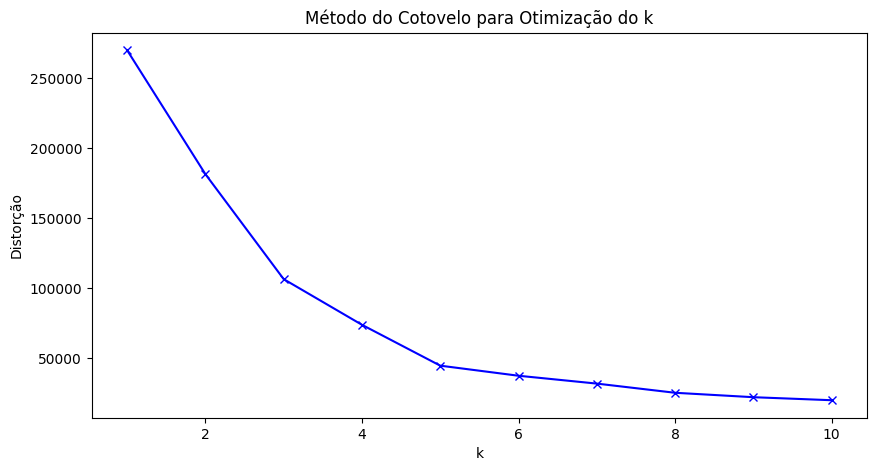

In [13]:
# isso daqui eh mt importante, vai fazer um grafico de cotovelo p gente ver quantos cluster vamo precisar 
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Método do Cotovelo para Otimização do k')

In [10]:
print(customer_data)

     Annual Income (k$)  Spending Score (1-100)  Cluster
0                    15                      39        2
1                    15                      81        2
2                    16                       6        2
3                    16                      77        2
4                    17                      40        2
..                  ...                     ...      ...
195                 120                      79        1
196                 126                      28        0
197                 126                      74        1
198                 137                      18        0
199                 137                      83        1

[200 rows x 3 columns]


In [14]:
modelo_kmeans = KMeans(n_clusters=5)
modelo_kmeans.fit(customer_data)

KMeans(n_clusters=5)

In [16]:
customer_data['Cluster'] = modelo_kmeans.predict(customer_data)
customer_data.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [15]:
silhouette = silhouette_score(customer_data, modelo_kmeans.labels_)
print(silhouette)

0.5540332609007453
